#📌 Extracão

In [1]:
pip install pandas requests

In [2]:
import pandas as pd
import requests
import json

# 1. URL do arquivo JSON "cru" (raw) no GitHub.
url_raw = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

print(f"Iniciando a carga de dados da URL: {url_raw}")

try:
    # 2. Fazer a requisição HTTP para obter os dados.
    # O timeout é uma boa prática para evitar que o código fique "preso" indefinidamente.
    response = requests.get(url_raw, timeout=30)

    # 3. Verificar se a requisição foi bem-sucedida (código de status 200 OK).
    # O método raise_for_status() lança uma exceção para códigos de erro (4xx ou 5xx).
    response.raise_for_status()

    print("Requisição bem-sucedida! Status:", response.status_code)

    # 4. Extrair o conteúdo JSON da resposta.
    # O método .json() da biblioteca requests já converte o texto JSON para um objeto Python (lista de dicionários).
    dados_json = response.json()

    # 5. Converter a lista de dicionários para um DataFrame do Pandas.
    # Esta é a etapa principal da conversão.
    df = pd.DataFrame(dados_json)

    print("\n✅ Dados convertidos para DataFrame com sucesso!")

    # 6. Exibir as primeiras linhas e informações básicas para verificação.
    print("\n--- Primeiras 5 linhas do DataFrame ---")
    print(df.head())

    print("\n--- Informações do DataFrame ---")
    df.info()

except requests.exceptions.HTTPError as http_err:
    print(f"Erro de HTTP: {http_err}")
except requests.exceptions.ConnectionError as conn_err:
    print(f"Erro de Conexão: {conn_err}")
except requests.exceptions.Timeout as timeout_err:
    print(f"Erro de Timeout: {timeout_err}")
except requests.exceptions.RequestException as req_err:
    print(f"Ocorreu um erro na requisição: {req_err}")
except json.JSONDecodeError:
    print("Erro ao decodificar o JSON. O conteúdo recebido pode não ser um JSON válido.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Iniciando a carga de dados da URL: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json
Requisição bem-sucedida! Status: 200

✅ Dados convertidos para DataFrame com sucesso!

--- Primeiras 5 linhas do DataFrame ---
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneServic

#🔧 Transformação

In [5]:
# Usando o DataFrame 'df' que carregamos no passo anterior.

print("--- Verificando os tipos de dados e valores nulos com .info() ---")
df.info()

--- Verificando os tipos de dados e valores nulos com .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [10]:
print("--- 1. Normalizando as colunas aninhadas (Abordagem Corrigida) ---")

df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])


# A função irá automaticamente navegar pelo dicionário aninhado 'Charges'.
df_account = pd.json_normalize(df['account'])

print("✅ Colunas desempacotadas com sucesso!")
print("\nObserve os novos nomes de coluna criados para 'Charges':")
print(df_account.columns) # Isso mostrará 'Charges.Monthly' e 'Charges.Total'

print("\n--- 2. Juntando tudo em um único DataFrame ---")

# Concatenamos todos os DataFrames normalizados com as colunas base.
df_flat = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

print("\n✅ DataFrame final e plano criado!")

# Opcional, mas recomendado: Renomear as colunas para remover o prefixo 'Charges.'
df_flat.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges'
}, inplace=True)


print("\n--- Estrutura Final do DataFrame 'df_flat' ---")
df_flat.info()

print("\n--- Primeiras 5 linhas do DataFrame Corrigido ---")
print(df_flat.head())

--- 1. Normalizando as colunas aninhadas (Abordagem Corrigida) ---
✅ Colunas desempacotadas com sucesso!

Observe os novos nomes de coluna criados para 'Charges':
Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

--- 2. Juntando tudo em um único DataFrame ---

✅ DataFrame final e plano criado!

--- Estrutura Final do DataFrame 'df_flat' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   Mu

In [16]:
#Verificando o data frame
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [17]:
print("--- 1. Exploração Inicial: Estrutura e Tipos de Dados ---")
# Usando .info() no nosso DataFrame CORRETO (df_flat)
df_flat.info()

# --- INSIGHT IMPORTANTE DA ANÁLISE ACIMA ---
# O df_flat.info() nos mostra que a coluna 'TotalCharges' foi interpretada como 'object' (texto),
# mas deveria ser numérica (float). Vamos corrigir isso!

print("\n\n--- 2. Limpeza e Correção de Tipos de Dados ---")

# Corrigindo a coluna 'TotalCharges' no DataFrame 'df_flat'
# pd.to_numeric converte a coluna para um tipo numérico.
# `errors='coerce'` transforma qualquer valor inválido em NaN (Not a Number).
df_flat['TotalCharges'] = pd.to_numeric(df_flat['TotalCharges'], errors='coerce')

# Vamos verificar quantos valores se tornaram NaN após a conversão
print(f"Valores nulos em 'TotalCharges' após conversão: {df_flat['TotalCharges'].isnull().sum()}")

# Para este exercício, vamos remover as linhas com valores nulos.
# Em um projeto real, poderíamos investigar ou imputar esses valores.
df_flat.dropna(subset=['TotalCharges'], inplace=True)

print(f"Dimensões do DataFrame após remover nulos: {df_flat.shape}")

# Verificando os tipos de dados novamente
print("\nTipos de dados após a limpeza:")
print(df_flat[['MonthlyCharges', 'TotalCharges']].dtypes)


print("\n\n--- 3. Análise Descritiva das Colunas ---")

# Análise de colunas numéricas com os nomes corretos
print("\n--- Estatísticas das Colunas Numéricas ---")
print(df_flat[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


# Análise de colunas categóricas
print("\n--- Análise das Principais Colunas Categóricas ---")

# Variável alvo 'Churn'
print("\nDistribuição da variável 'Churn':")
print(df_flat['Churn'].value_counts(normalize=True)) # normalize=True mostra em percentual

# Outras variáveis categóricas relevantes
print("\nTipo de Contrato (Contract):")
print(df_flat['Contract'].value_counts())

print("\nProvedor de Internet (InternetService):")
print(df_flat['InternetService'].value_counts())

print("\nForma de Pagamento (PaymentMethod):")
print(df_flat['PaymentMethod'].value_counts())


print("\n\n--- 4. Conclusão: Colunas Mais Relevantes para Análise de Evasão (Churn) ---")

print("""
Com base na exploração inicial e no dicionário de dados, estas são as colunas que,
por hipótese, têm maior potencial para influenciar a decisão de um cliente em deixar a empresa:

1.  **Variável Alvo**:
    * `Churn`: É a variável que queremos prever.

2.  **Fatores Contratuais e Financeiros (MUITO RELEVANTES)**:
    * `Contract`: Contratos mensais vs. anuais.
    * `tenure`: Antiguidade do cliente.
    * `MonthlyCharges` e `TotalCharges`: O custo dos serviços.

3.  **Serviços Contratados**:
    * `InternetService`, `TechSupport`, `OnlineSecurity`, etc.

4.  **Perfil Demográfico do Cliente**:
    * `SeniorCitizen`, `Partner`, `Dependents`.

A coluna `customerID` será descartada em etapas futuras, pois é apenas um identificador.
""")

--- 1. Exploração Inicial: Estrutura e Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   ob

In [18]:

# Supondo que 'df_flat' é o nosso DataFrame limpo e estruturado da etapa anterior.

print("--- Iniciando Verificação de Qualidade dos Dados ---")

# 1. Verificação de Valores Ausentes (NaN)
print(f"\n[1] Total de valores ausentes (NaN) no DataFrame: {df_flat.isnull().sum().sum()}")
# Esperado: 0, pois já tratamos a coluna TotalCharges.

# 2. Verificação de Dados Duplicados
print(f"\n[2] Total de linhas completamente duplicadas: {df_flat.duplicated().sum()}")

# Verificação mais importante: customerID deve ser único.
print(f"   Total de IDs de cliente (customerID) duplicados: {df_flat['customerID'].duplicated().sum()}")
# Esperado: 0. Se houver IDs duplicados, é um problema sério de integridade.

print("\n--- [3] Verificação de Inconsistências em Colunas Categóricas ---")

# Vamos investigar a coluna 'Churn' que detectamos no passo anterior.
print(f"\nValores únicos na coluna 'Churn': {df_flat['Churn'].unique()}")

# Contando os valores em branco para confirmar nossa suspeita
churn_vazio_count = (df_flat['Churn'] == ' ').sum() + (df_flat['Churn'] == '').sum()
print(f"Número de registros com 'Churn' em branco: {churn_vazio_count}")

# --- AÇÃO DE LIMPEZA ---
# Como não sabemos se esses clientes saíram ou não, e eles são uma pequena fração (cerca de 3%),
# a abordagem mais segura é removê-los do dataset.
df_clean = df_flat[df_flat['Churn'].str.strip() != ''].copy()

print(f"\nDimensões antes da limpeza do 'Churn': {df_flat.shape}")
print(f"Dimensões após a limpeza do 'Churn':  {df_clean.shape}")
print("Registros com 'Churn' em branco foram removidos.")

# Verificação final para garantir que o problema foi resolvido
print(f"\nValores únicos em 'Churn' após a limpeza: {df_clean['Churn'].unique()}")

print("\n--- Verificação Geral (Pente-Fino) ---")
print("Analisando valores únicos em todas as colunas de texto para outros problemas:\n")

# Loop que passa por todas as colunas do tipo 'object' e mostra seus valores únicos
# Isso é ótimo para encontrar outras inconsistências, como 'Male' e 'male'.
for column in df_clean.select_dtypes(include=['object']).columns:
    print(f"Coluna '{column}': {df_clean[column].unique()}")

print("\n--- Verificação de Qualidade Concluída ---")
# A partir de agora, usaremos o DataFrame 'df_clean'

--- Iniciando Verificação de Qualidade dos Dados ---

[1] Total de valores ausentes (NaN) no DataFrame: 0

[2] Total de linhas completamente duplicadas: 0
   Total de IDs de cliente (customerID) duplicados: 0

--- [3] Verificação de Inconsistências em Colunas Categóricas ---

Valores únicos na coluna 'Churn': ['No' 'Yes' '']
Número de registros com 'Churn' em branco: 224

Dimensões antes da limpeza do 'Churn': (7256, 21)
Dimensões após a limpeza do 'Churn':  (7032, 21)
Registros com 'Churn' em branco foram removidos.

Valores únicos em 'Churn' após a limpeza: ['No' 'Yes']

--- Verificação Geral (Pente-Fino) ---
Analisando valores únicos em todas as colunas de texto para outros problemas:

Coluna 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna 'Churn': ['No' 'Yes']
Coluna 'gender': ['Female' 'Male']
Coluna 'Partner': ['Yes' 'No']
Coluna 'Dependents': ['Yes' 'No']
Coluna 'PhoneService': ['Yes' 'No']
Coluna 'MultipleLines': ['No' '

In [19]:
import pandas as pd

# Supondo que 'df_clean' é o DataFrame resultante do passo anterior,
# já sem os registros de 'Churn' em branco.

print("--- Iniciando Padronização de Categorias ---")

# Vamos usar o método .replace() que é muito eficiente para substituir múltiplos valores de uma vez.
# Ele vai procurar em todo o DataFrame por esses valores e substituí-los.
df_clean.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)

print("\n✅ Substituição concluída!")

print("\n--- Verificando o Resultado da Padronização ---")
print("Analisando os valores únicos nas colunas que foram modificadas:\n")

# Lista das colunas que continham as categorias que acabamos de alterar
colunas_afetadas = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Loop para mostrar que a limpeza funcionou
for column in colunas_afetadas:
    print(f"Coluna '{column}': {df_clean[column].unique()}")

print("\n--- Padronização de Dados Concluída ---")
print("O DataFrame 'df_clean' está agora com as categorias totalmente padronizadas.")

--- Iniciando Padronização de Categorias ---

✅ Substituição concluída!

--- Verificando o Resultado da Padronização ---
Analisando os valores únicos nas colunas que foram modificadas:

Coluna 'MultipleLines': ['No' 'Yes']
Coluna 'OnlineSecurity': ['No' 'Yes']
Coluna 'OnlineBackup': ['Yes' 'No']
Coluna 'DeviceProtection': ['No' 'Yes']
Coluna 'TechSupport': ['Yes' 'No']
Coluna 'StreamingTV': ['Yes' 'No']
Coluna 'StreamingMovies': ['No' 'Yes']

--- Padronização de Dados Concluída ---
O DataFrame 'df_clean' está agora com as categorias totalmente padronizadas.


In [20]:


# Supondo que 'df_clean' é o nosso DataFrame final, limpo e padronizado.

print("--- Iniciando a criação da feature 'Contas_Diarias' ---")

# 1. Definir a constante para o número médio de dias em um mês
DIAS_NO_MES_MEDIA = 30.44

# 2. Criar a nova coluna
# O Pandas realiza a operação em todos os elementos da coluna de uma só vez (vetorização).
df_clean['Contas_Diarias'] = df_clean['MonthlyCharges'] / DIAS_NO_MES_MEDIA

print("\n✅ Coluna 'Contas_Diarias' criada com sucesso!")

# 3. Verificação do resultado
print("\n--- Verificando as 5 primeiras linhas com a nova coluna ---")
# Vamos exibir as colunas lado a lado para comparar e validar.
print(df_clean[['customerID', 'MonthlyCharges', 'Contas_Diarias']].head())


print("\n--- Análise descritiva da nova coluna ---")
# O .describe() nos ajuda a entender a distribuição dos novos valores.
print(df_clean[['MonthlyCharges', 'Contas_Diarias']].describe())

--- Iniciando a criação da feature 'Contas_Diarias' ---

✅ Coluna 'Contas_Diarias' criada com sucesso!

--- Verificando as 5 primeiras linhas com a nova coluna ---
   customerID  MonthlyCharges  Contas_Diarias
0  0002-ORFBO            65.6        2.155059
1  0003-MKNFE            59.9        1.967806
2  0004-TLHLJ            73.9        2.427727
3  0011-IGKFF            98.0        3.219448
4  0013-EXCHZ            83.9        2.756242

--- Análise descritiva da nova coluna ---
       MonthlyCharges  Contas_Diarias
count     7032.000000     7032.000000
mean        64.798208        2.128719
std         30.085974        0.988370
min         18.250000        0.599540
25%         35.587500        1.169103
50%         70.350000        2.311104
75%         89.862500        2.952119
max        118.750000        3.901117


In [21]:
import pandas as pd

# Supondo que 'df_clean' é o nosso DataFrame final, limpo e padronizado da etapa anterior.

print("--- Iniciando a Padronização e Transformação de Dados ---")


# --- 1. Binarização de Colunas Categóricas ---

print("\n[1] Convertendo colunas binárias para formato numérico (1 e 0)...")

# Coluna alvo (target)
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# Colunas com respostas 'Yes'/'No'
colunas_sim_nao = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in colunas_sim_nao:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})

# Coluna de gênero
df_clean['gender'] = df_clean['gender'].map({'Male': 1, 'Female': 0})

print("✅ Binarização concluída.")


# --- 2. Tradução e Renomeação das Colunas ---

print("\n[2] Renomeando colunas para o português...")

# Dicionário de tradução: { 'nome_antigo': 'nome_novo' }
dicionario_colunas = {
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso', # SeniorCitizen já é 1 ou 0
    'Partner': 'Possui_Parceiro',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefonico',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'MonthlyCharges': 'Fatura_Mensal',
    'TotalCharges': 'Fatura_Total',
    'Contas_Diarias': 'Fatura_Diaria',
    'Churn': 'Evasao' # Nossa variável alvo
}

df_clean.rename(columns=dicionario_colunas, inplace=True)

print("✅ Colunas renomeadas.")


# --- 3. Verificação Final ---

print("\n--- Verificando a transformação dos dados ---")
print("\nNovos nomes das colunas:")
print(df_clean.columns.tolist())

print("\nTipos de dados após a binarização (observe os novos 'int64'):")
df_clean.info(verbose=False, memory_usage=False) # Versão compacta do .info()

print("\nVisualizando as 5 primeiras linhas do DataFrame transformado:")
print(df_clean.head())

--- Iniciando a Padronização e Transformação de Dados ---

[1] Convertendo colunas binárias para formato numérico (1 e 0)...
✅ Binarização concluída.

[2] Renomeando colunas para o português...
✅ Colunas renomeadas.

--- Verificando a transformação dos dados ---

Novos nomes das colunas:
['ID_Cliente', 'Evasao', 'Genero', 'Idoso', 'Possui_Parceiro', 'Possui_Dependentes', 'Meses_Contrato', 'Servico_Telefonico', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento', 'Fatura_Mensal', 'Fatura_Total', 'Fatura_Diaria']

Tipos de dados após a binarização (observe os novos 'int64'):
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Columns: 22 entries, ID_Cliente to Fatura_Diaria
dtypes: float64(3), int64(8), object(11)
Visualizando as 5 primeiras linhas do DataFrame transformado:
   ID_Cliente  Evasao  Genero  Idoso  Pos

#📊 Carga e análise

In [22]:
# Supondo que 'df_clean' é o nosso DataFrame final, pronto para análise.

# Para melhor visualização dos números, vamos formatar a saída do pandas
pd.options.display.float_format = '{:.2f}'.format

print("--- Análise Descritiva dos Dados ---")

# --- 1. Análise das Variáveis Numéricas ---
print("\n[1] Estatísticas Descritivas das Principais Colunas Numéricas:\n")

# Usamos .describe() para obter média, mediana (50%), desvio padrão, etc.
# Selecionamos as colunas que representam valores contínuos ou contagens.
colunas_numericas = ['Meses_Contrato', 'Fatura_Mensal', 'Fatura_Diaria', 'Fatura_Total']
print(df_clean[colunas_numericas].describe())


# --- 2. Análise das Variáveis Categóricas (incluindo as binarizadas) ---
print("\n\n[2] Análise de Frequência das Principais Colunas Categóricas:\n")

# A métrica de negócio mais importante: a taxa de evasão (Churn)
print("--- Taxa de Evasão (Churn) ---")
print(df_clean['Evasao'].value_counts())
# Usamos normalize=True para ver o resultado em percentual
taxa_evasao = df_clean['Evasao'].value_counts(normalize=True) * 100
print(f"\nPercentual de Evasão: \n{taxa_evasao.round(2)}\n")

# Analisando o perfil demográfico (Idosos)
# A média de uma coluna binária (0 ou 1) é igual ao percentual de 1s.
percentual_idosos = df_clean['Idoso'].mean() * 100
print(f"--- Perfil dos Clientes ---\nPercentual de Clientes Idosos: {percentual_idosos:.2f}%")

# Analisando o tipo de contrato, que é uma variável categórica com mais de 2 opções
print("\n--- Distribuição por Tipo de Contrato ---")
print(df_clean['Tipo_Contrato'].value_counts())
print(f"\nPercentual por Contrato: \n{df_clean['Tipo_Contrato'].value_counts(normalize=True) * 100}\n")

# Analisando o método de pagamento
print("\n--- Distribuição por Método de Pagamento ---")
print(df_clean['Metodo_Pagamento'].value_counts())

--- Análise Descritiva dos Dados ---

[1] Estatísticas Descritivas das Principais Colunas Numéricas:

       Meses_Contrato  Fatura_Mensal  Fatura_Diaria  Fatura_Total
count         7032.00        7032.00        7032.00       7032.00
mean            32.42          64.80           2.13       2283.30
std             24.55          30.09           0.99       2266.77
min              1.00          18.25           0.60         18.80
25%              9.00          35.59           1.17        401.45
50%             29.00          70.35           2.31       1397.47
75%             55.00          89.86           2.95       3794.74
max             72.00         118.75           3.90       8684.80


[2] Análise de Frequência das Principais Colunas Categóricas:

--- Taxa de Evasão (Churn) ---
Evasao
0    5163
1    1869
Name: count, dtype: int64

Percentual de Evasão: 
Evasao
0   73.42
1   26.58
Name: proportion, dtype: float64

--- Perfil dos Clientes ---
Percentual de Clientes Idosos: 16.24%

---

In [23]:
pip install matplotlib seaborn


--- Iniciando a Análise Visual da Evasão de Clientes ---
Gerando Gráfico de Pizza...


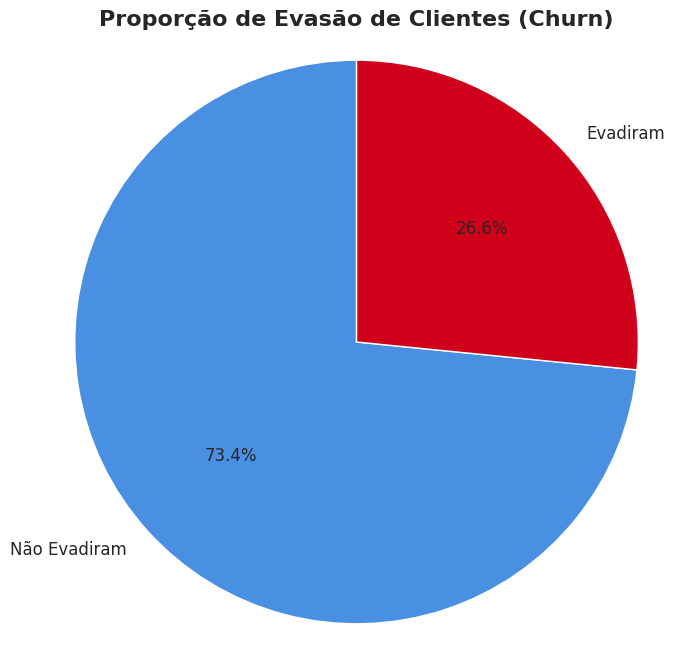

Gerando Gráfico de Contagem...


/tmp/ipython-input-3248872922.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Evadiram', 'Evadiram'])


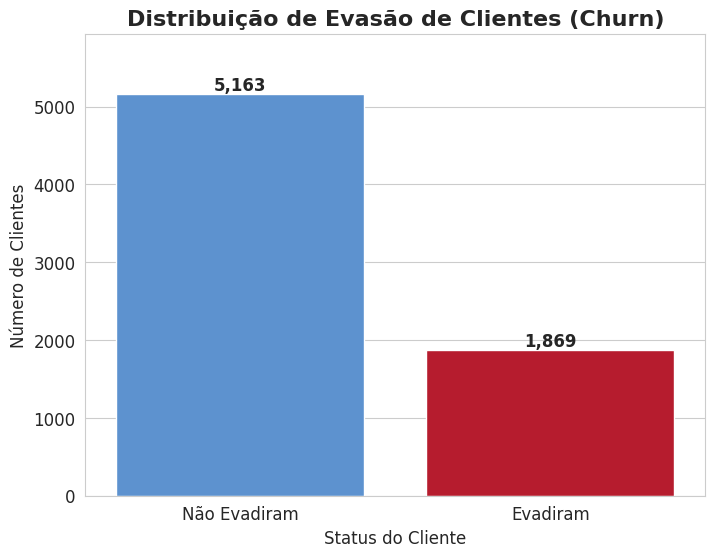

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df_clean' é o nosso DataFrame pronto para análise.

print("--- Iniciando a Análise Visual da Evasão de Clientes ---")

# Para deixar os gráficos mais bonitos, vamos usar o estilo do seaborn
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12 # Aumentar o tamanho da fonte para melhor legibilidade

# --- Gráfico 1: Gráfico de Pizza (Proporção) ---

# Primeiro, vamos calcular a contagem de cada categoria em 'Evasao'
churn_counts = df_clean['Evasao'].value_counts()

# Mapear os valores (0, 1) para rótulos mais claros
labels = churn_counts.index.map({0: 'Não Evadiram', 1: 'Evadiram'})
colors = ['#4A90E2', '#D0021B'] # Azul para quem ficou, vermelho para quem saiu

plt.figure(figsize=(8, 8)) # Define o tamanho da figura
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white'}) # autopct formata os percentuais

plt.title('Proporção de Evasão de Clientes (Churn)', fontsize=16, fontweight='bold')
plt.axis('equal')  # Garante que o gráfico de pizza seja um círculo.
print("Gerando Gráfico de Pizza...")
plt.show()


# --- Gráfico 2: Gráfico de Contagem (Total de Clientes) ---

plt.figure(figsize=(8, 6)) # Define um novo tamanho de figura para o gráfico de barras
ax = sns.countplot(x='Evasao', data=df_clean, palette=colors, hue='Evasao', legend=False)

# Melhorar os rótulos do eixo x
ax.set_xticklabels(['Não Evadiram', 'Evadiram'])

# Adicionar anotações de texto (os números exatos) em cima das barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}'.format, fontsize=12, fontweight='bold')

# Definir títulos e rótulos
plt.title('Distribuição de Evasão de Clientes (Churn)', fontsize=16, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
ax.set_ylim(0, churn_counts.max() * 1.15) # Aumentar o limite do eixo y para dar espaço ao texto

print("Gerando Gráfico de Contagem...")
plt.show()

--- Análise da Evasão por Variáveis Categóricas ---


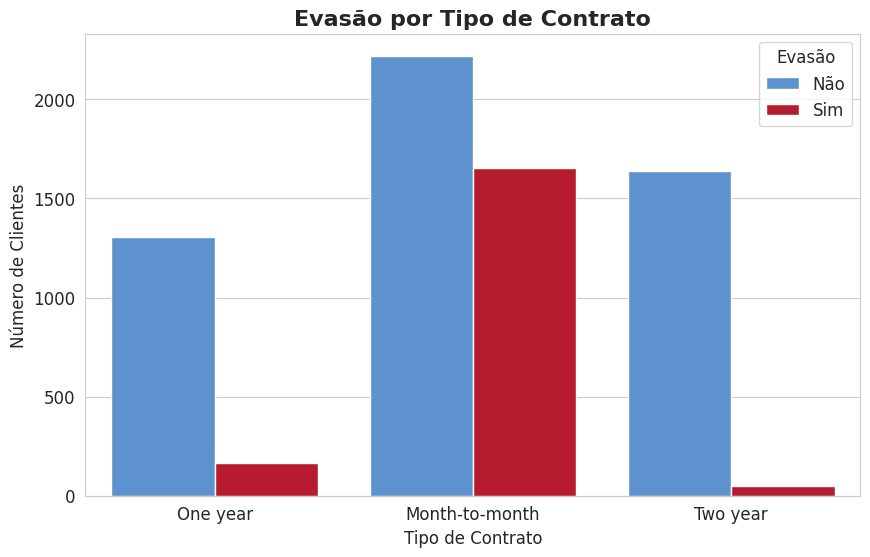

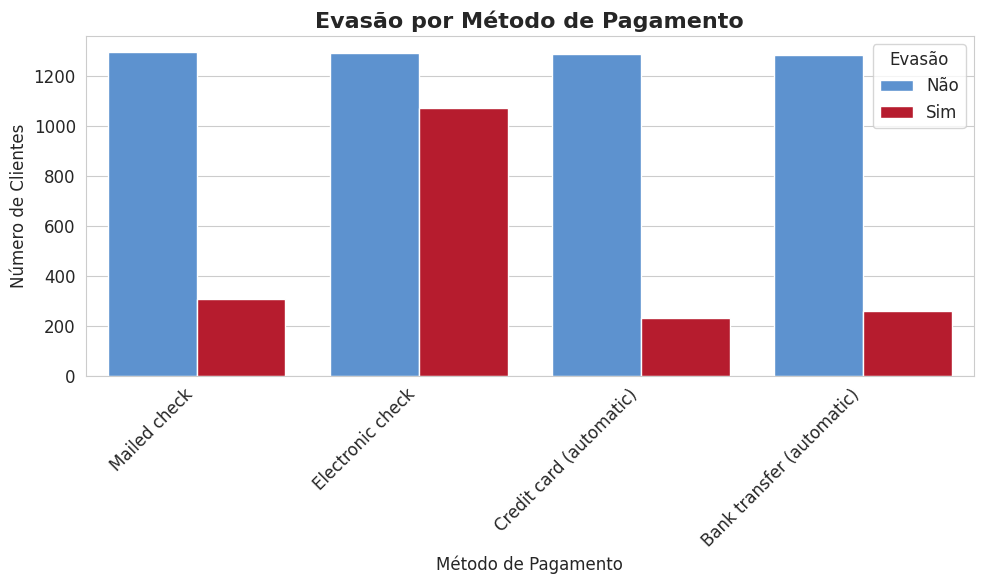

/tmp/ipython-input-654012355.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Feminino', 'Masculino'])
/tmp/ipython-input-654012355.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Não Idoso', 'Idoso'])
/tmp/ipython-input-654012355.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Não', 'Sim'])
/tmp/ipython-input-654012355.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Não', 'Sim'])


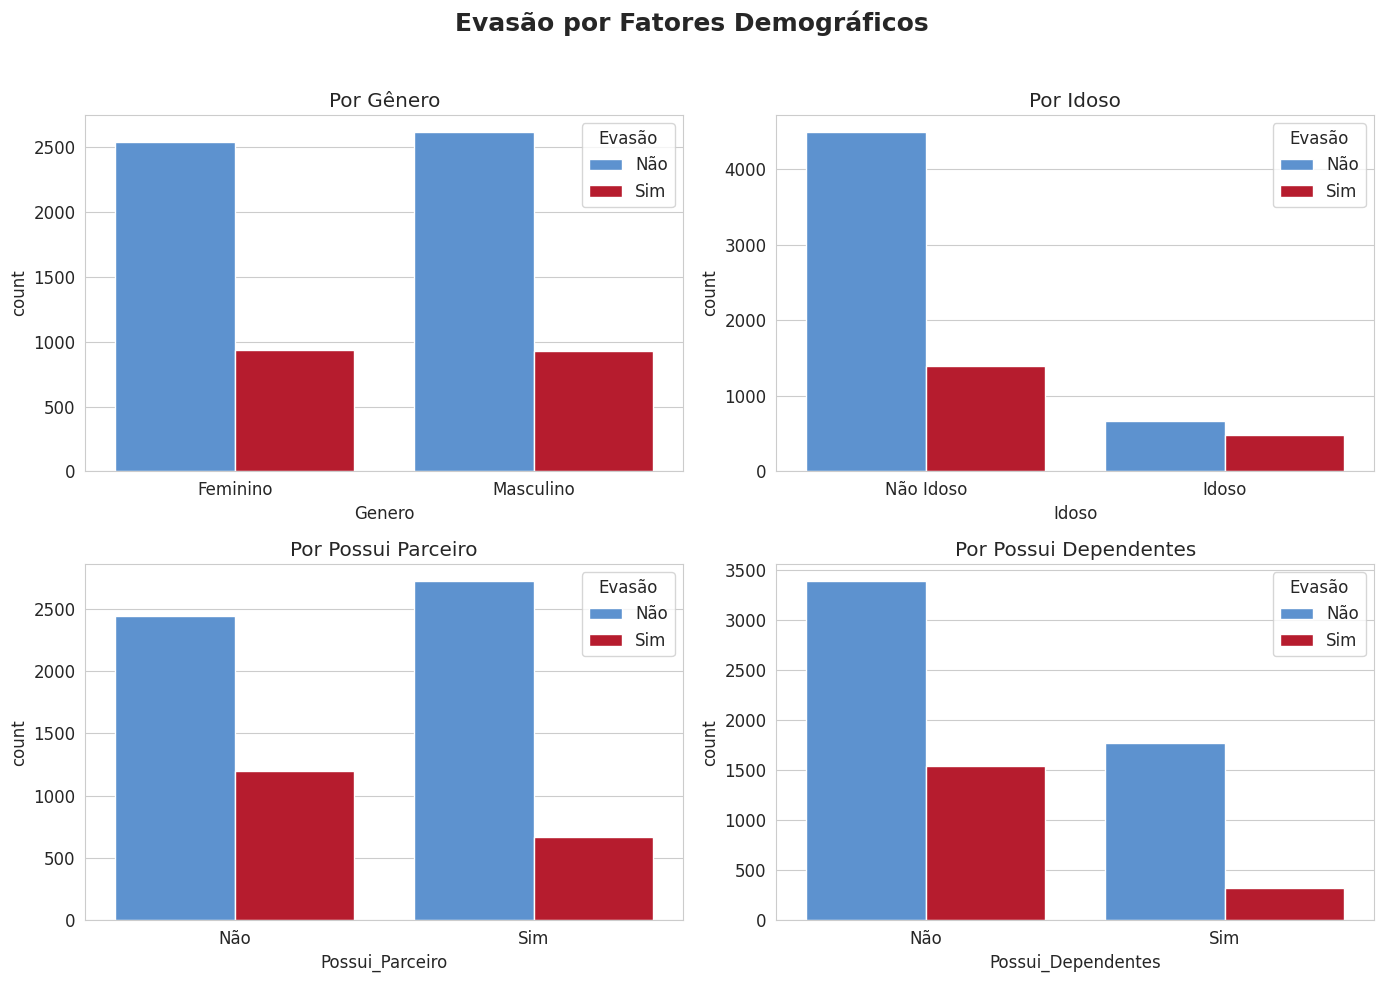

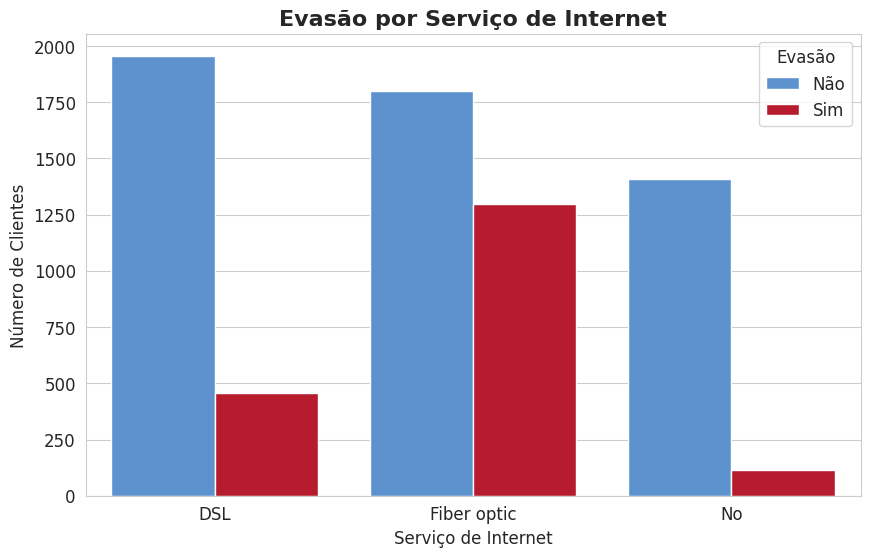

In [27]:
# Supondo que 'df_clean' é o nosso DataFrame pronto para análise.

# Configurações de estilo para os gráficos
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6) # Um bom tamanho padrão para os gráficos

print("--- Análise da Evasão por Variáveis Categóricas ---")

# --- 1. Análise por Fatores Contratuais e Financeiros ---

# Variável: Tipo de Contrato
sns.countplot(x='Tipo_Contrato', hue='Evasao', data=df_clean, palette=['#4A90E2', '#D0021B'])
plt.title('Evasão por Tipo de Contrato', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()

# Variável: Método de Pagamento
sns.countplot(x='Metodo_Pagamento', hue='Evasao', data=df_clean, palette=['#4A90E2', '#D0021B'])
plt.title('Evasão por Método de Pagamento', fontsize=16, fontweight='bold')
plt.xlabel('Método de Pagamento', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos para não sobrepor
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.tight_layout() # Ajustar o layout para caber os rótulos
plt.show()


# --- 2. Análise por Fatores Demográficos ---

# Criando uma figura com vários subplots para otimizar o espaço
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Evasão por Fatores Demográficos', fontsize=18, fontweight='bold')

# Gênero
sns.countplot(ax=axes[0, 0], x='Genero', hue='Evasao', data=df_clean, palette=['#4A90E2', '#D0021B'])
axes[0, 0].set_title('Por Gênero')
axes[0, 0].set_xticklabels(['Feminino', 'Masculino'])
axes[0, 0].legend(title='Evasão', labels=['Não', 'Sim'])

# Idoso
sns.countplot(ax=axes[0, 1], x='Idoso', hue='Evasao', data=df_clean, palette=['#4A90E2', '#D0021B'])
axes[0, 1].set_title('Por Idoso')
axes[0, 1].set_xticklabels(['Não Idoso', 'Idoso'])
axes[0, 1].legend(title='Evasão', labels=['Não', 'Sim'])

# Possui Parceiro
sns.countplot(ax=axes[1, 0], x='Possui_Parceiro', hue='Evasao', data=df_clean, palette=['#4A90E2', '#D0021B'])
axes[1, 0].set_title('Por Possui Parceiro')
axes[1, 0].set_xticklabels(['Não', 'Sim'])
axes[1, 0].legend(title='Evasão', labels=['Não', 'Sim'])

# Possui Dependentes
sns.countplot(ax=axes[1, 1], x='Possui_Dependentes', hue='Evasao', data=df_clean, palette=['#4A90E2', '#D0021B'])
axes[1, 1].set_title('Por Possui Dependentes')
axes[1, 1].set_xticklabels(['Não', 'Sim'])
axes[1, 1].legend(title='Evasão', labels=['Não', 'Sim'])

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar layout para o título principal
plt.show()


# --- 3. Análise por Serviços Contratados ---

# Variável: Serviço de Internet
sns.countplot(x='Servico_Internet', hue='Evasao', data=df_clean, palette=['#4A90E2', '#D0021B'])
plt.title('Evasão por Serviço de Internet', fontsize=16, fontweight='bold')
plt.xlabel('Serviço de Internet', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Evasão', labels=['Não', 'Sim'])
plt.show()

--- Análise da Evasão por Variáveis Numéricas ---

Analisando a relação entre Meses de Contrato e Evasão...


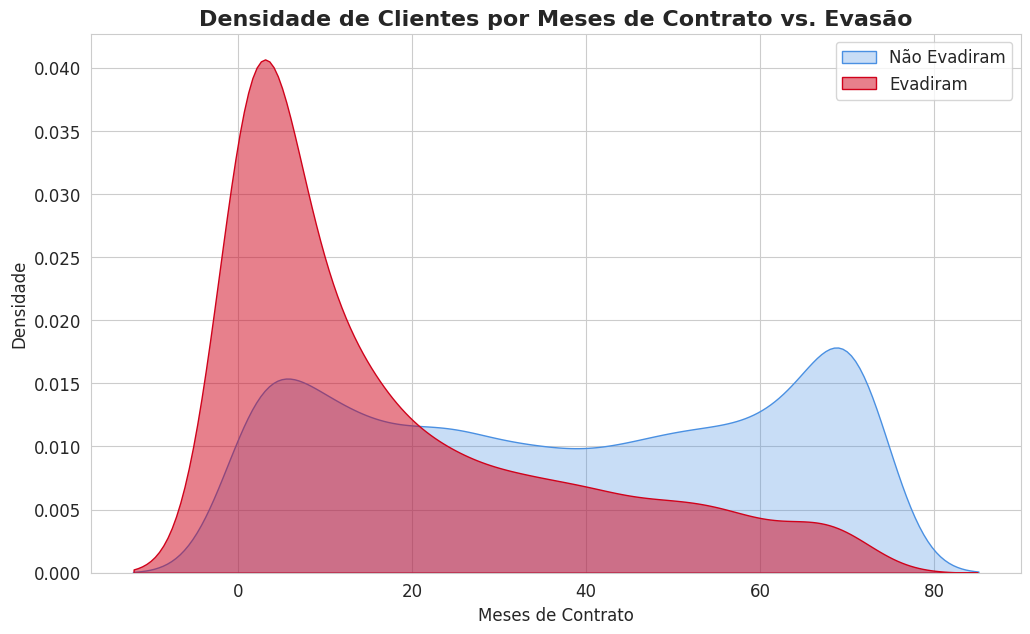

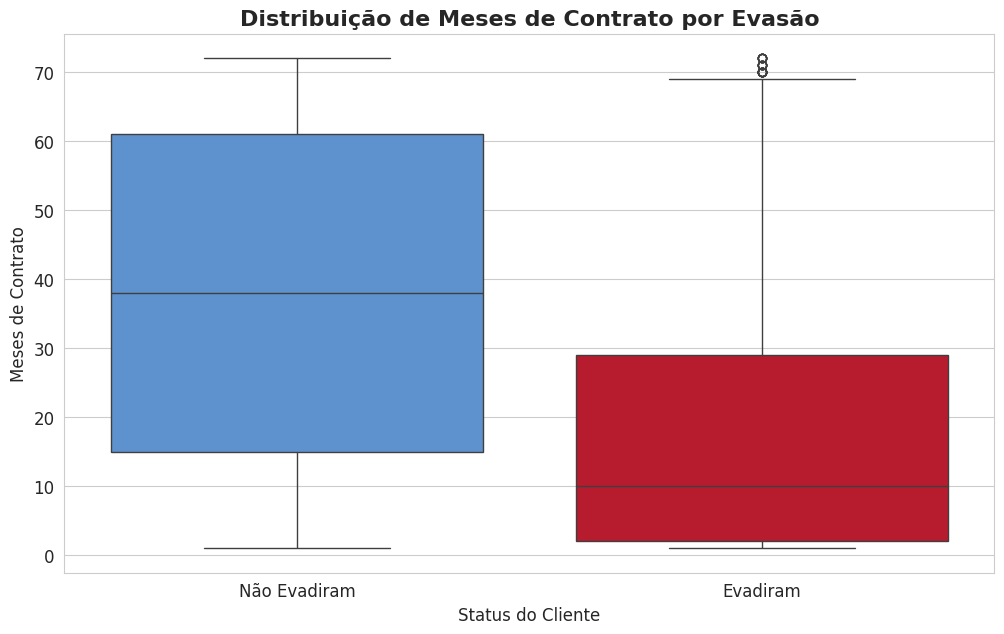


Analisando a relação entre Fatura Mensal e Evasão...


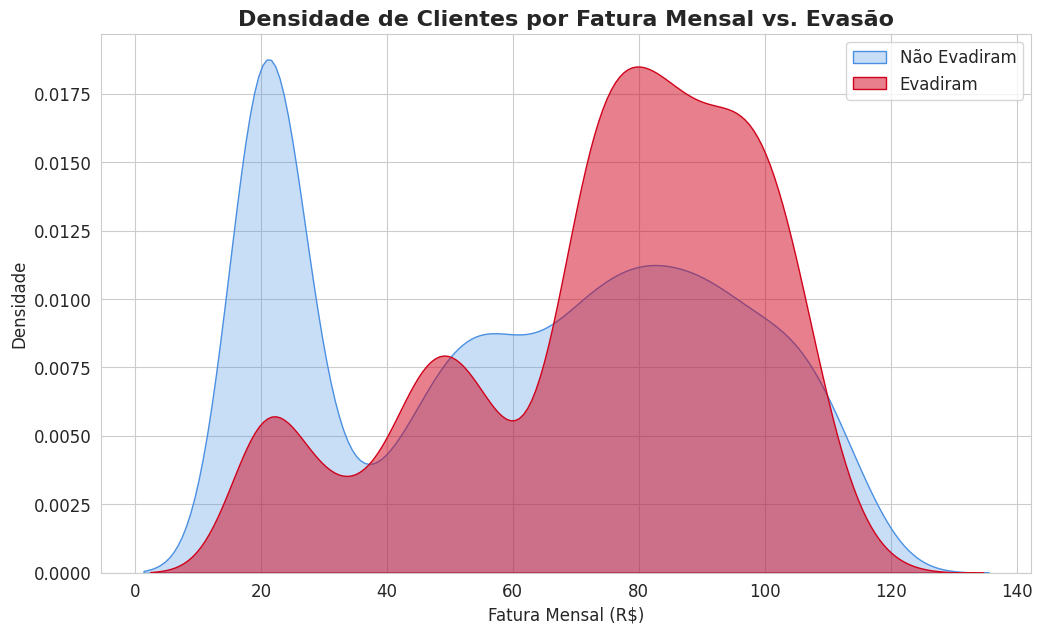

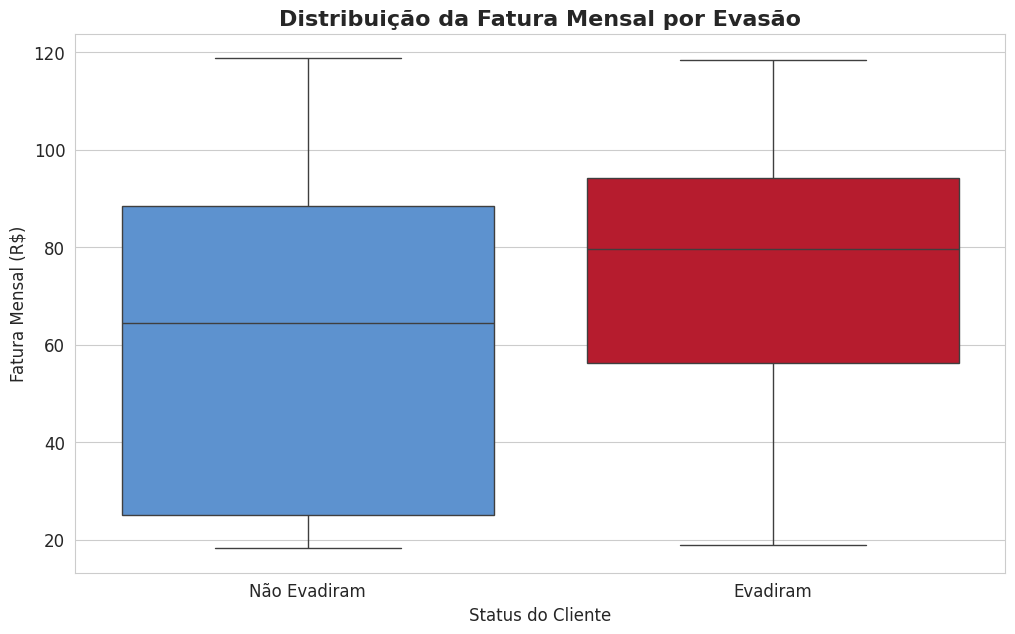

In [29]:

# Supondo que 'df_clean' é o nosso DataFrame pronto para análise.

# Configurações de estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

print("--- Análise da Evasão por Variáveis Numéricas ---")

# --- 1. Análise por Meses de Contrato (Tenure) ---

print("\nAnalisando a relação entre Meses de Contrato e Evasão...")

# Gráfico de Densidade (KDE)
plt.title('Densidade de Clientes por Meses de Contrato vs. Evasão', fontsize=16, fontweight='bold')
sns.kdeplot(df_clean[df_clean['Evasao'] == 0]['Meses_Contrato'],
            label='Não Evadiram', color='#4A90E2', fill=True, alpha=.3)
sns.kdeplot(df_clean[df_clean['Evasao'] == 1]['Meses_Contrato'],
            label='Evadiram', color='#D0021B', fill=True, alpha=.5)
plt.xlabel('Meses de Contrato', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.show()

# Box Plot
plt.title('Distribuição de Meses de Contrato por Evasão', fontsize=16, fontweight='bold')
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_clean, palette=['#4A90E2', '#D0021B'], hue='Evasao', legend=False)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram'])
plt.show()


# --- 2. Análise por Fatura Mensal ---

print("\nAnalisando a relação entre Fatura Mensal e Evasão...")

# Gráfico de Densidade (KDE)
plt.title('Densidade de Clientes por Fatura Mensal vs. Evasão', fontsize=16, fontweight='bold')
sns.kdeplot(df_clean[df_clean['Evasao'] == 0]['Fatura_Mensal'],
            label='Não Evadiram', color='#4A90E2', fill=True, alpha=.3)
sns.kdeplot(df_clean[df_clean['Evasao'] == 1]['Fatura_Mensal'],
            label='Evadiram', color='#D0021B', fill=True, alpha=.5)
plt.xlabel('Fatura Mensal (R$)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.show()

# Box Plot
plt.title('Distribuição da Fatura Mensal por Evasão', fontsize=16, fontweight='bold')
sns.boxplot(x='Evasao', y='Fatura_Mensal', data=df_clean, palette=['#4A90E2', '#D0021B'], hue='Evasao', legend=False)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Fatura Mensal (R$)', fontsize=12)
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram'])
plt.show()

#📄Relatorio Final